<h1>Activity : PHDENGUE Analysis </h1>
<hr>
<h2>Analyst : Elysalyn Barlan</h2>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('new_dataset\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


<h1>Changing the Null Values</h1>


In [5]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [6]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB



<h1>Changing Data Types</h1>

In [7]:
dengue['Month']= dengue['Month'].astype('category')
dengue['Region']= dengue['Region'].astype('category')

In [8]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(2), int64(3)
memory usage: 27.1 KB


<h1> Mortality Rate per each Region </h1>

In [9]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [10]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [11]:
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [12]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


In [13]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(2), int64(3)
memory usage: 27.1 KB


<hr>
<h1>Explanatory Data Analysis (EDA)</h1>

<h2>1. Which region has recorded the highest number of dengue cases?</h2>

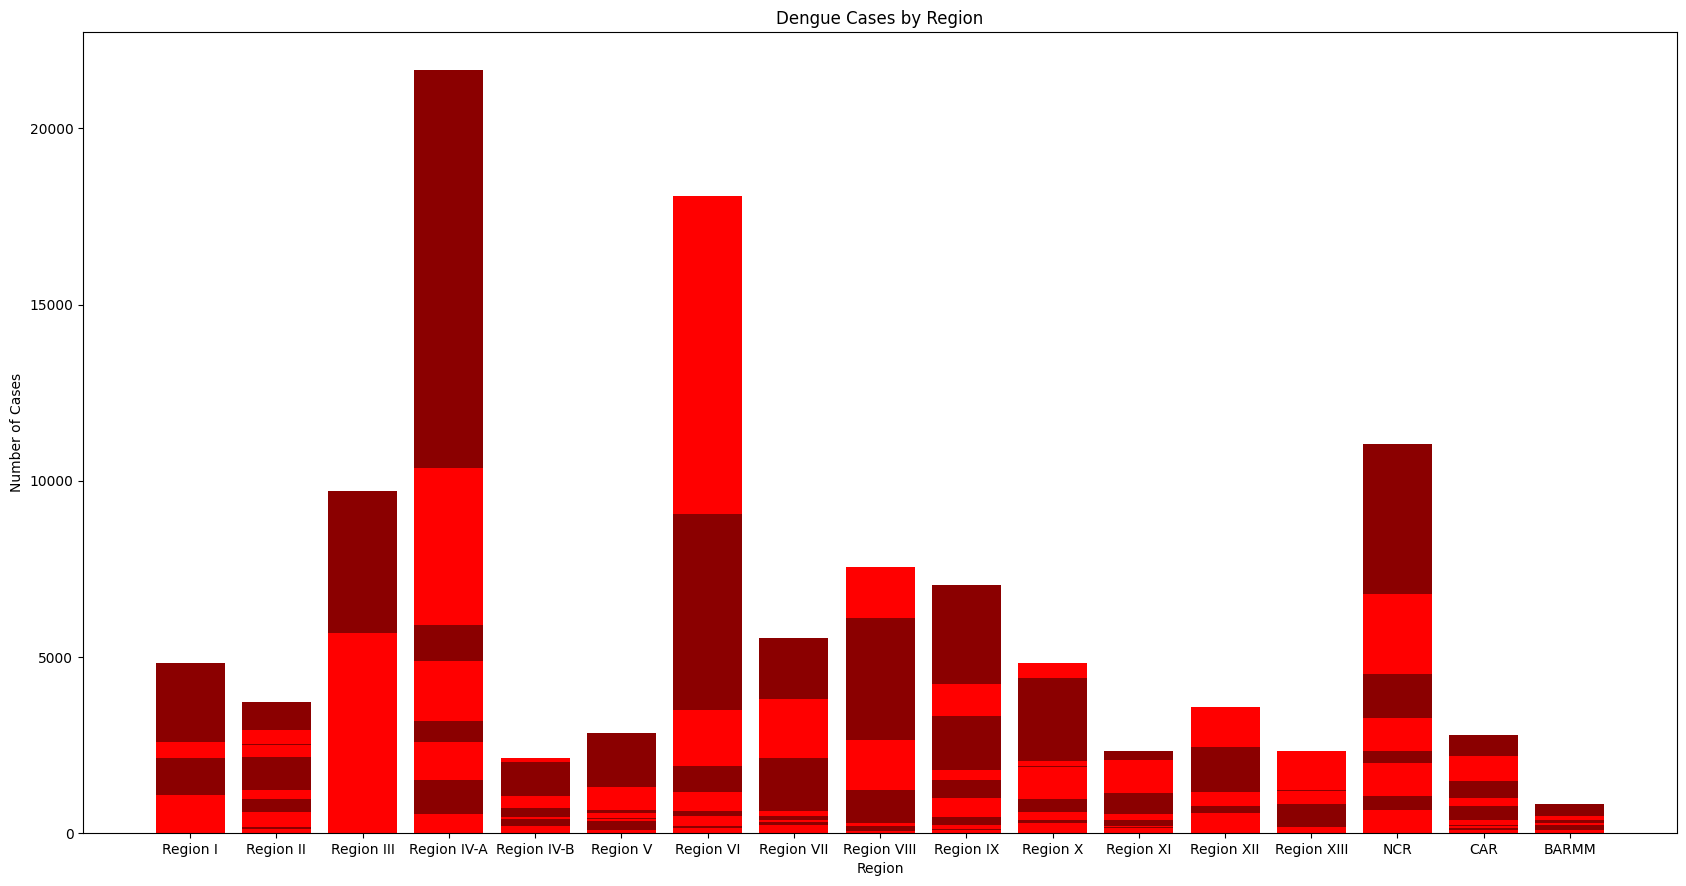

In [14]:
plt.bar(dengue['Region'], dengue['Dengue_Cases'], color=['darkred', 'red'])
plt.title('Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.gcf().set_size_inches(19,10)
plt.show()

<h4>Insight: The visualization reveals that Regions IV-A and VI recorded the highest number of dengue cases, indicating potential hotspots that may require intensified vector control and public health interventions. In contrast, BARMM and CAR reported the fewest cases, suggesting either effective local control measures or possible underreporting that warrants further investigation. </h4>

<hr>
<h2>2. How have dengue cases changed over the years?</h2>

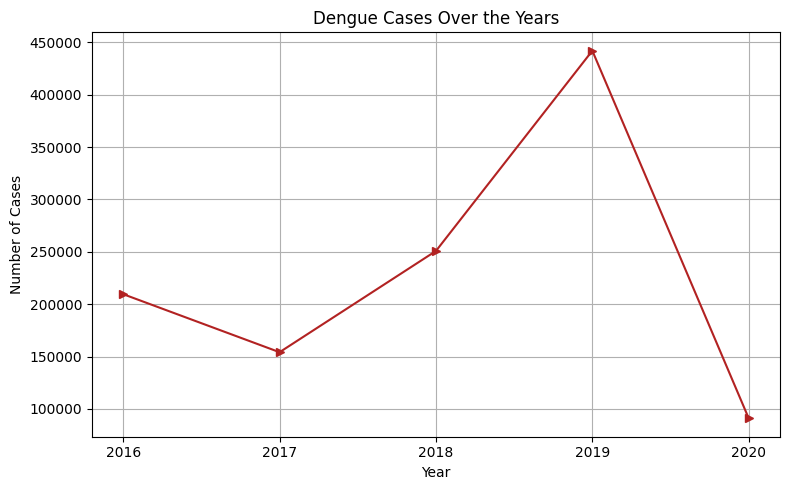

In [15]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()
yearly_cases['Year'] = yearly_cases['Year'].astype(int)

plt.figure(figsize=(8, 5))
plt.plot(yearly_cases['Year'], yearly_cases['Dengue_Cases'], marker='>', color='firebrick')
plt.title('Dengue Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(yearly_cases['Year']) 
plt.grid(True)
plt.tight_layout()
plt.show()

<h4>Insight: The trend shows a sharp increase in dengue cases from 2017 to 2019, peaking significantly in 2019, which may indicate a major outbreak or intensified transmission during that year. However, cases drastically declined in 2020, likely influenced by pandemic-related movement restrictions and enhanced public health measures that indirectly reduced dengue transmission.</h4>

<hr>
<h2>3. How did dengue case changes throughout the months from 2016 to 2020?</h2>

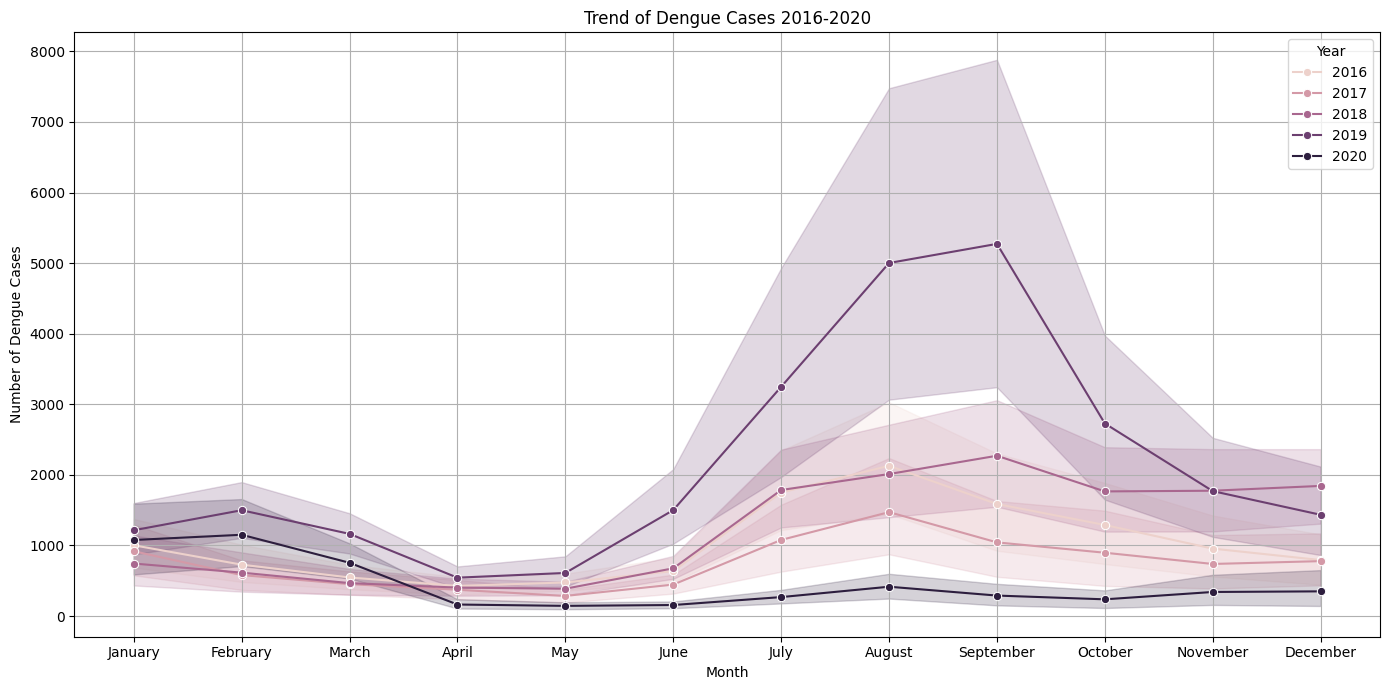

In [26]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)



# Create the line plot
sns.lineplot(data = dengue, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(14,7)
plt.title('Trend of Dengue Cases 2016-2020')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h4>Insight : The data shows a clear seasonal pattern in dengue incidence, with cases usually peaking between July and September, when mosquito reproduction is facilitated by the rainy season. Notably, 2019 had the worst mid-year surge, highlighting the increased susceptibility at this time and highlighting the necessity of focused vector control measures prior to the months of highest transmission.</h4>

<hr>
<h2>4. How did mortality rate varies across regions and years?</h2>

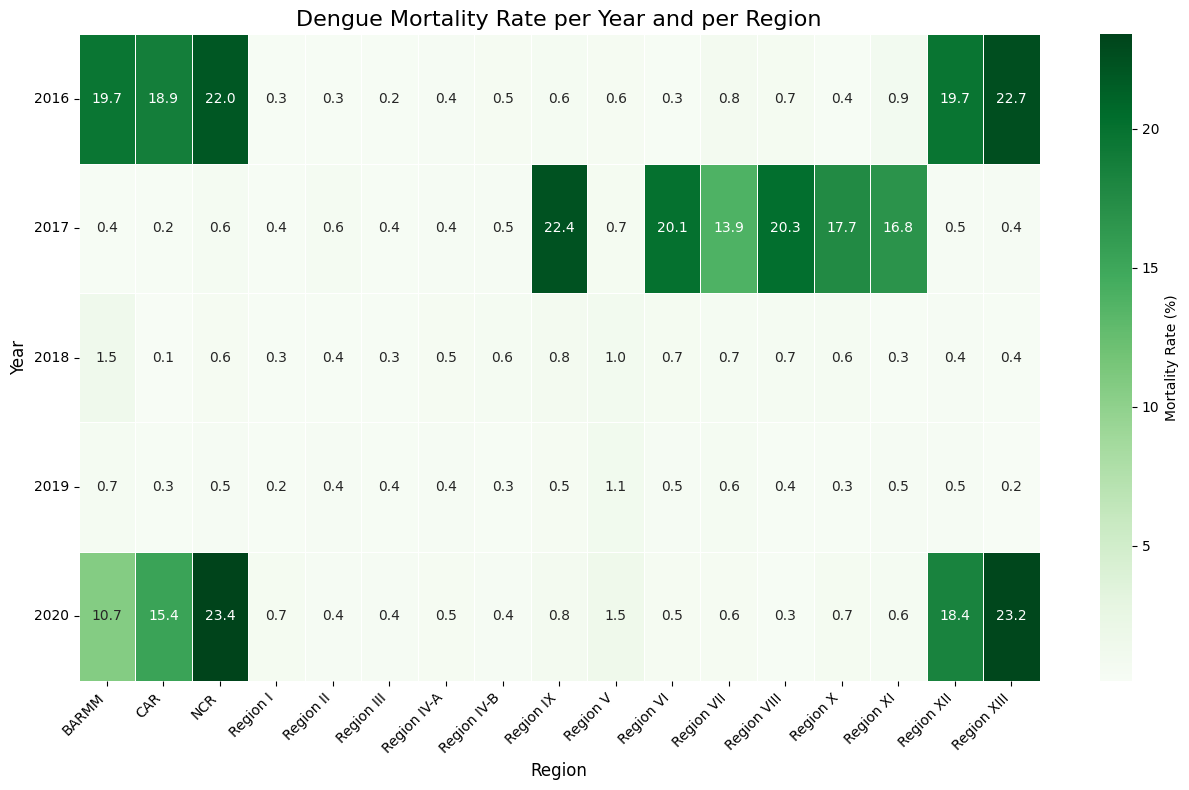

In [36]:
dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Greens", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.gcf().set_size_inches(13, 8)
plt.title('Dengue Mortality Rate per Year and per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h4>Insight : The chart shows that NCR and Region XIII had the highest dengue mortality rates, especially in 2016 and 2020. This suggests that some regions may have faced more severe outbreaks or challenges in providing timely medical care.</h4>

<hr>
<h2>5. Which month recorded the highest number of dengue deaths?</h2>

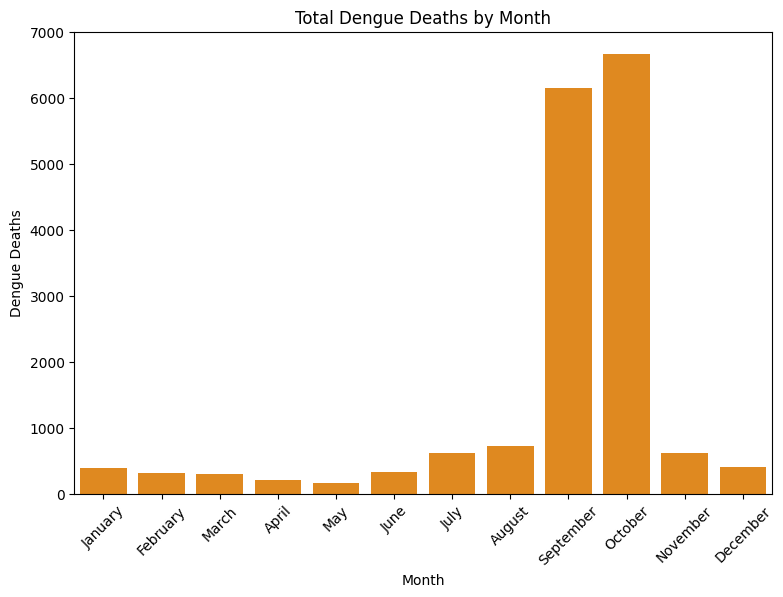

In [67]:
deaths_per_month = dengue.groupby("Month")["Dengue_Deaths"].sum()

plt.figure(figsize=(9,6))
sns.barplot(x=deaths_per_month.index, y=deaths_per_month.values, color="darkorange")
plt.title("Total Dengue Deaths by Month")
plt.xlabel("Month")
plt.ylabel("Dengue Deaths")
plt.xticks(rotation=45)
plt.show()

<h4>Insight : The distribution shows a sharp rise in dengue-related deaths during September and October, aligning with the typical peak of dengue transmission following the rainy season. This pattern highlights the critical need for intensified preventive measures and healthcare preparedness during late monsoon months to reduce mortality rates.</h4>

<hr>
<h2>6. How do dengue case numbers compare to dengue-related deaths across different regions?</h2>

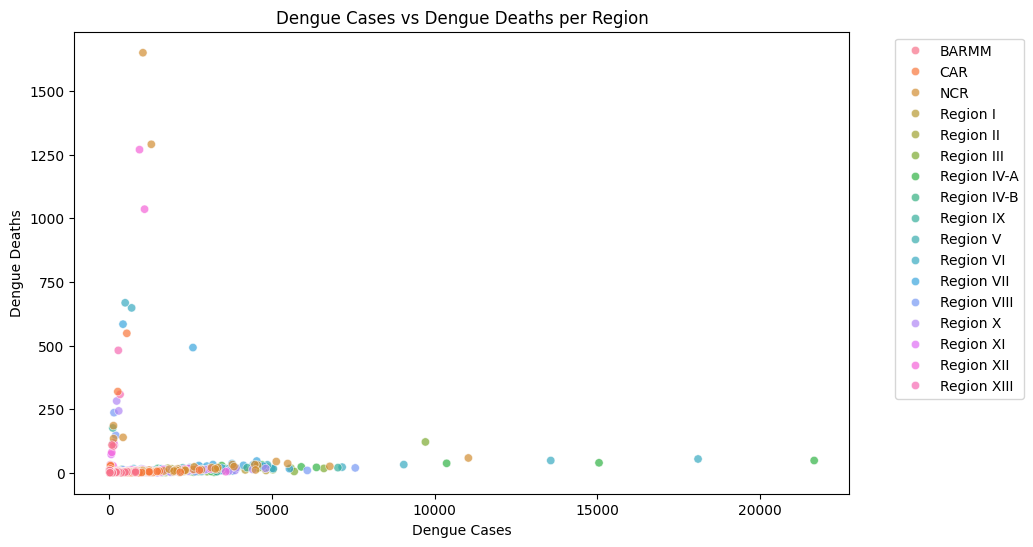

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths", hue="Region", alpha=0.7)
plt.title("Dengue Cases vs Dengue Deaths per Region")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h4>Insight : The scatter plot demonstrates that regions with higher dengue cases do not always correspond to higher mortality, indicating variability in healthcare response and case management efficiency. A few regions exhibit disproportionately high deaths despite fewer cases, suggesting potential gaps in early detection, access to treatment, or public health infrastructure.</h4>

<hr>
<h2>7. How did dengue cases in Region VII change between 2016 and 2020?</h2>

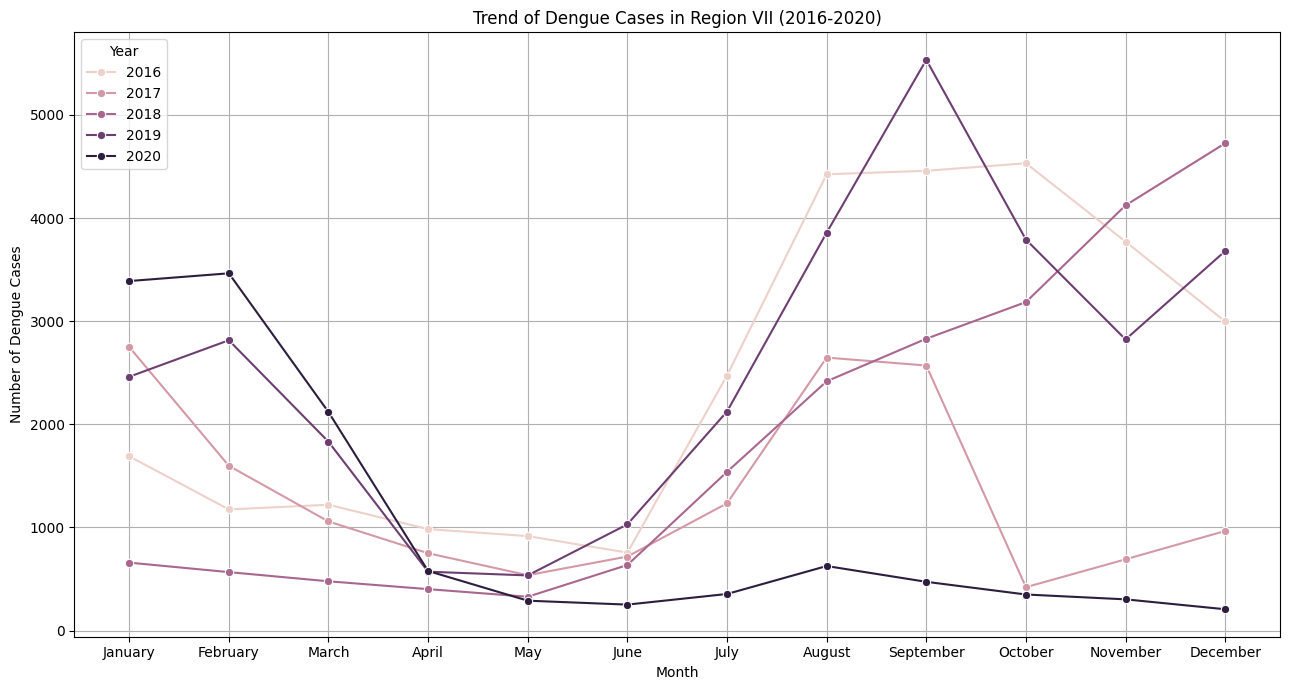

In [57]:
region7 = dengue[dengue['Region'] == "Region VII"]

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)



sns.lineplot(data = region7, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13,7)
plt.title('Trend of Dengue Cases in Region VII (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h4>Insight : According to the data, there were frequent dengue outbreaks in Region VII between July and October, with 2019 having the greatest peak of all the years that were recorded. The steady mid-year rise emphasizes the seasonal impact of temperature and rainfall on dengue transmission, underscoring the necessity of aggressive vector management before to the rainy season.</h4>

<hr>
<h2>8. During 2017, which month recorded the highest mortality rate?</h2>

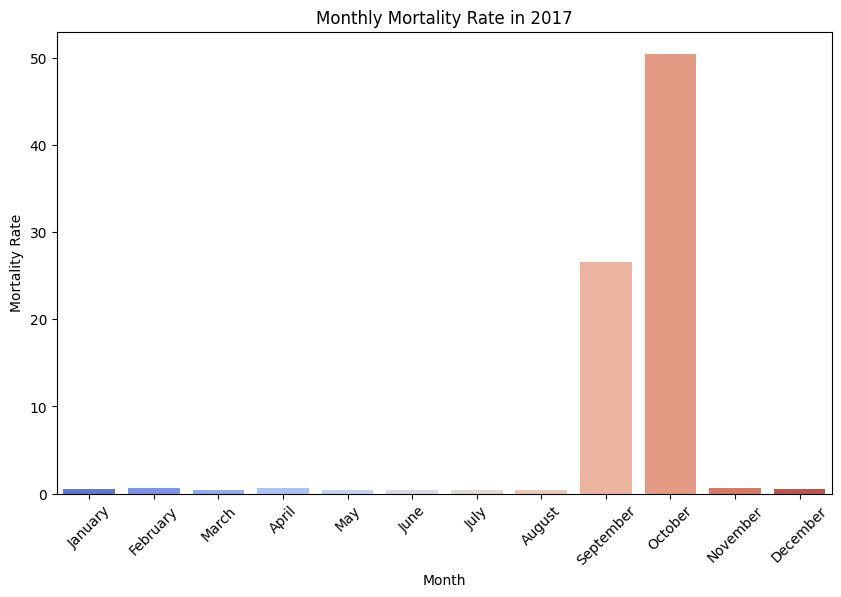

In [69]:
dengue_2017 = dengue[dengue['Year'] == 2017]
monthly_mortality = dengue_2017.groupby('Month')['Mortality_Rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_mortality, x='Month', y='Mortality_Rate', palette='coolwarm')
plt.title('Monthly Mortality Rate in 2017')
plt.xlabel('Month')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45)
plt.show()

<h4>Insight : </h4>

<hr>
<h2>9. How did dengue deaths in NCR change between 2016 and 2020?</h2>

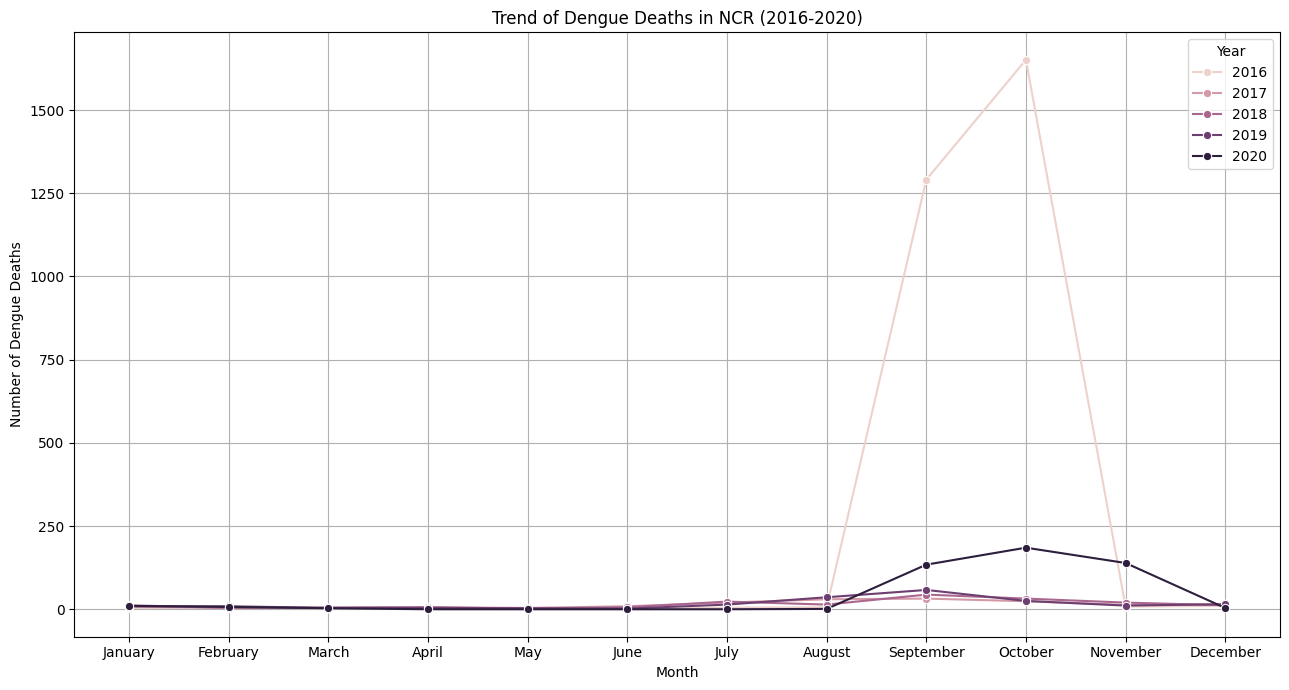

In [63]:
regionNCR = dengue[dengue['Region'] == "NCR"]

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)



sns.lineplot(data = regionNCR, x='Month', y='Dengue_Deaths', hue='Year', marker='o')
plt.gcf().set_size_inches(13,7)
plt.title('Trend of Dengue Deaths in NCR (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Deaths')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h4>Insight : The graph shows that dengue deaths in NCR peaked sharply during September and October of 2016, indicating a severe outbreak that year. In contrast, deaths from 2017 to 2020 remained relatively low and stable, suggesting improved disease control or milder outbreaks in subsequent years.</h4>

<hr>
<h2>10. Which month recorded the lowest number of dengue-related deaths in Region VI from the year 2016 to 2020?</h2>

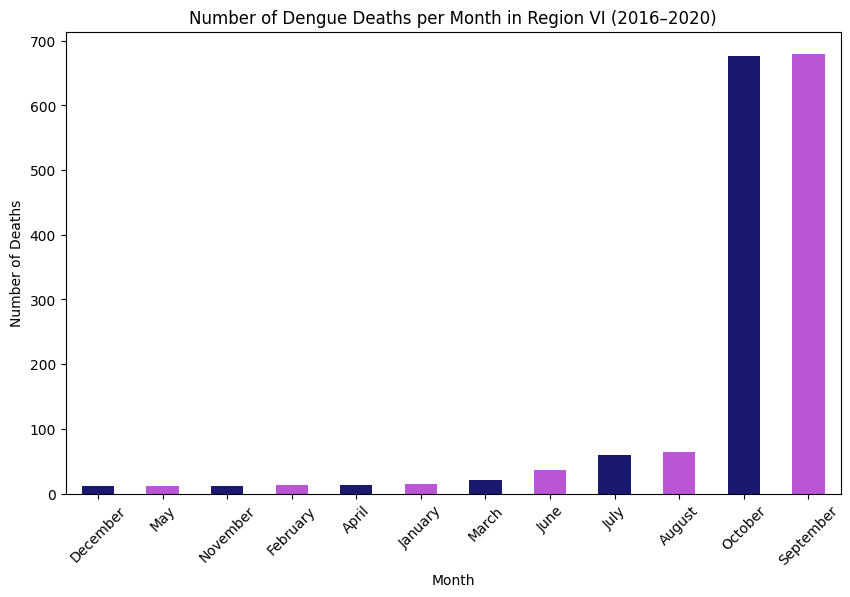

In [73]:
lower_dengue = dengue[(dengue["Region"] == "Region VI") &(dengue["Year"])]

monthly_deaths = lower_dengue.groupby("Month")["Dengue_Deaths"].sum().sort_values(ascending=True)

highest_month = monthly_deaths.idxmax()
highest_value = monthly_deaths.max()

plt.figure(figsize=(10,6))
monthly_deaths.plot(kind="bar", color=['midnightblue', 'mediumorchid'])
plt.title("Number of Dengue Deaths per Month in Region VI (2016–2020)")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.show()

<h4>Insight : The data indicates that dengue deaths in Region VI peaked sharply in September and October, with significantly higher mortality compared to other months. This trend suggests that the late rainy season may have contributed to increased mosquito breeding and transmission, leading to higher fatality rates during these months.</h4>